<a href="https://colab.research.google.com/github/syno3/Data-science-portfolio/blob/main/bitcoin_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries needed

from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('btc-usd.csv')
data

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.622850e+12,6/5/2021 0:01,BTCUSD,36898.77,36898.77,36826.40,36826.40,0.263336
1,1.622850e+12,6/5/2021 0:00,BTCUSD,36868.01,36960.03,36867.19,36898.77,5.241806
2,1.622850e+12,6/4/2021 23:59,BTCUSD,36880.38,36891.44,36867.18,36868.01,0.204162
3,1.622850e+12,6/4/2021 23:58,BTCUSD,36902.85,36902.85,36819.88,36880.38,0.319934
4,1.622850e+12,6/4/2021 23:57,BTCUSD,36861.14,36909.17,36861.14,36902.85,0.239848
...,...,...,...,...,...,...,...,...
223151,1.609460e+12,1/1/2021 0:04,BTCUSD,29056.21,29056.21,29046.04,29048.46,0.032502
223152,1.609460e+12,1/1/2021 0:03,BTCUSD,29057.27,29057.27,29028.69,29056.21,0.049909
223153,1.609460e+12,1/1/2021 0:02,BTCUSD,29085.38,29086.14,29043.25,29057.27,5.075271
223154,1.609460e+12,1/1/2021 0:01,BTCUSD,29033.01,29086.14,29033.01,29085.38,1.451389


In [27]:
data.isnull().sum()

Unix Timestamp    0
Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [28]:
data.info

<bound method DataFrame.info of         Unix Timestamp            Date  Symbol  ...       Low     Close    Volume
0         1.622850e+12   6/5/2021 0:01  BTCUSD  ...  36826.40  36826.40  0.263336
1         1.622850e+12   6/5/2021 0:00  BTCUSD  ...  36867.19  36898.77  5.241806
2         1.622850e+12  6/4/2021 23:59  BTCUSD  ...  36867.18  36868.01  0.204162
3         1.622850e+12  6/4/2021 23:58  BTCUSD  ...  36819.88  36880.38  0.319934
4         1.622850e+12  6/4/2021 23:57  BTCUSD  ...  36861.14  36902.85  0.239848
...                ...             ...     ...  ...       ...       ...       ...
223151    1.609460e+12   1/1/2021 0:04  BTCUSD  ...  29046.04  29048.46  0.032502
223152    1.609460e+12   1/1/2021 0:03  BTCUSD  ...  29028.69  29056.21  0.049909
223153    1.609460e+12   1/1/2021 0:02  BTCUSD  ...  29043.25  29057.27  5.075271
223154    1.609460e+12   1/1/2021 0:01  BTCUSD  ...  29033.01  29085.38  1.451389
223155    1.609460e+12   1/1/2021 0:00  BTCUSD  ...  28956.18  290

In [29]:
data.shape

(223156, 8)

In [30]:
data.columns

Index(['Unix Timestamp', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close',
       'Volume'],
      dtype='object')

In [128]:
df = data[['Date','Close']]


In [129]:
df.index

RangeIndex(start=0, stop=223156, step=1)

In [132]:
df.columns = ['ds','y']
df

,ds,y
0,6/5/2021 0:01,36826.40
1,6/5/2021 0:00,36898.77
2,6/4/2021 23:59,36868.01
3,6/4/2021 23:58,36880.38
4,6/4/2021 23:57,36902.85
...,...,...
223151,1/1/2021 0:04,29048.46
223152,1/1/2021 0:03,29056.21
223153,1/1/2021 0:02,29057.27
223154,1/1/2021 0:01,29085.38


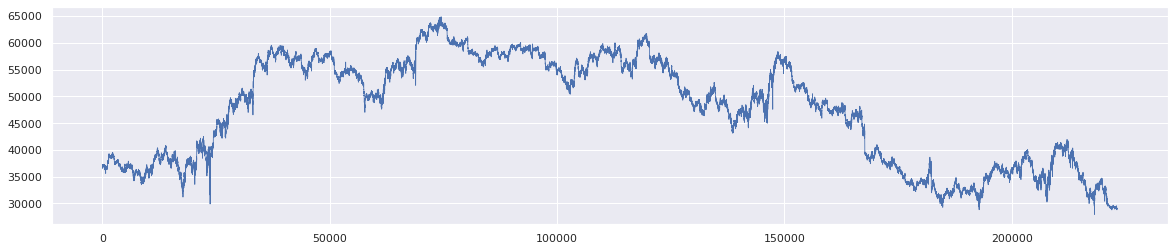

In [134]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20, 4)})
df['y'].plot(linewidth=0.8);

In [141]:
m = NeuralProphet()
metrics = m.fit(df, freq="D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 128
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 5


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[5/5]: 100%|██████████| 5/5 [00:31<00:00,  6.39s/it, SmoothL1Loss=0.00539, MAE=3.24e+3, RegLoss=0]


In [144]:
future = m.make_future_dataframe(df, periods=365)
forecast = m.predict(future)

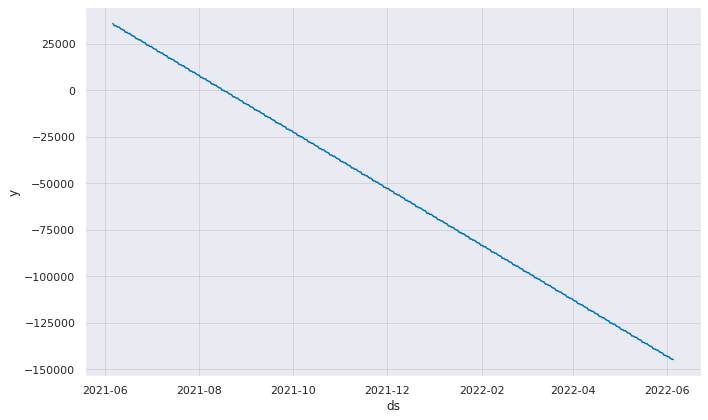

In [145]:
forecasts_plot = m.plot(forecast)

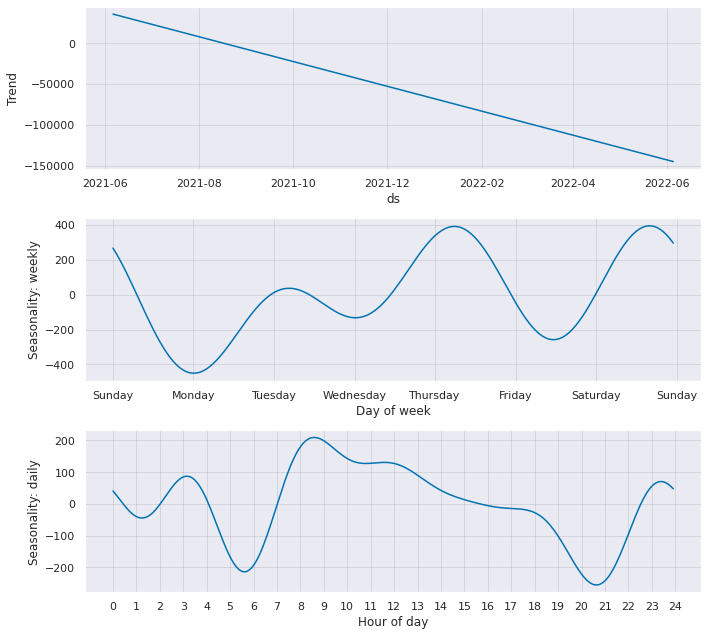

In [146]:
fig_comp = m.plot_components(forecast)

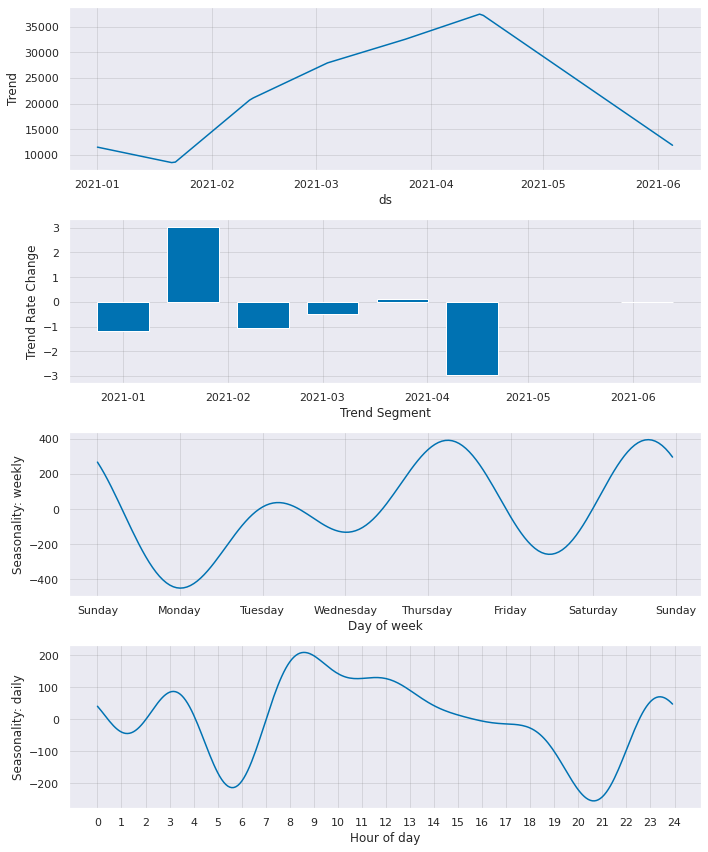

In [147]:
fig_param = m.plot_parameters()